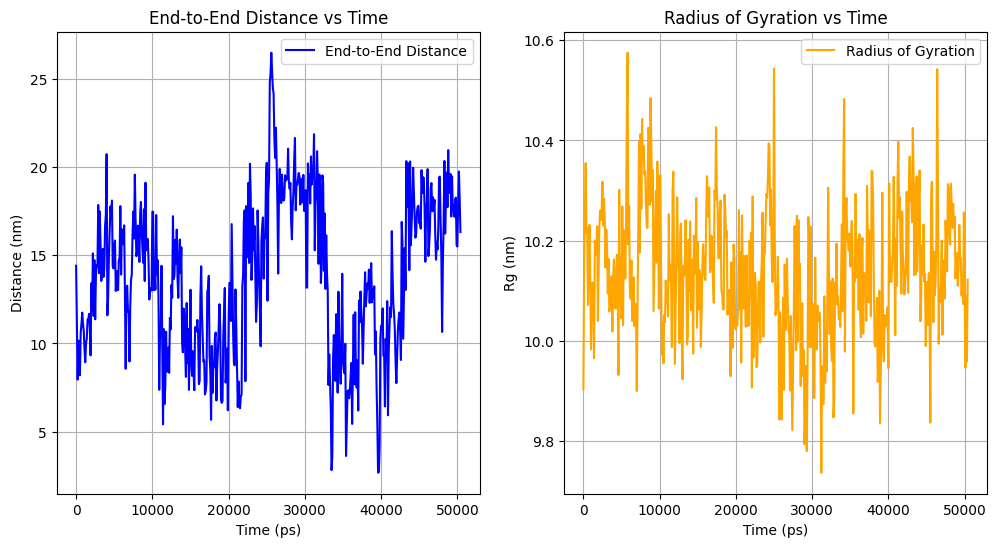

In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

u = mda.Universe('step4.1_equilibration.tpr', 'wrapped.xtc')
protein = u.select_atoms('protein')

# Calculate end-to-end distance for each frame
end_to_end_distance = np.zeros(len(u.trajectory))

for i, ts in enumerate(u.trajectory):
    end_to_end_distance[i] = np.linalg.norm(protein.positions[0] - protein.positions[-1])

# Calculate radius of gyration for each frame
Rg = np.array([protein.radius_of_gyration() for ts in u.trajectory])

timestep = u.trajectory.dt  # Ensure you have the correct timestep
time = np.arange(len(Rg)) * timestep

plt.figure(figsize=(12, 6))

# End-to-End Distance Plot
plt.subplot(1, 2, 1)
plt.plot(time, end_to_end_distance, label='End-to-End Distance', color='blue')
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.title('End-to-End Distance vs Time')
plt.legend()
plt.grid()

# Radius of Gyration Plot
plt.subplot(1, 2, 2)
plt.plot(time, Rg, label='Radius of Gyration', color='orange')
plt.xlabel('Time (ps)')
plt.ylabel('Rg (nm)')
plt.title('Radius of Gyration vs Time')
plt.legend()
plt.grid()

plt.savefig('rg_and_eed_plot.png')
plt.show()
